<a href="https://colab.research.google.com/github/arijit1201/ml_algos_from_scratch/blob/master/ML_01_sentdex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to the notes](https://pythonprogramming.net/features-labels-machine-learning-tutorial/)

In [ ]:
!pip install quandl
import quandl

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [ ]:
import math, datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
quandl.ApiConfig.api_key = "VXe_rhheMwsDG5gj1xsX"

In [ ]:
df = quandl.get('WIKI/GOOGL')

In [ ]:
df = pd.read_csv('')

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [ ]:
df.shape

(3424, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3424 non-null   float64
 1   High         3424 non-null   float64
 2   Low          3424 non-null   float64
 3   Close        3424 non-null   float64
 4   Volume       3424 non-null   float64
 5   Ex-Dividend  3424 non-null   float64
 6   Split Ratio  3424 non-null   float64
 7   Adj. Open    3424 non-null   float64
 8   Adj. High    3424 non-null   float64
 9   Adj. Low     3424 non-null   float64
 10  Adj. Close   3424 non-null   float64
 11  Adj. Volume  3424 non-null   float64
dtypes: float64(12)
memory usage: 347.8 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000,3424.0,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,7.818568e+06,0.165880,1.0,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,8.248211e+06,9.706436,0.0,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,2.430647e+06,0.000000,1.0,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,5.076200e+06,0.000000,1.0,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,1.020910e+07,0.000000,1.0,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


In [ ]:
df.to_csv (r'/content/drive/My Drive/python data/quandl1.csv', index = False, header=True)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/python data/quandl1.csv', parse_dates=True)

In [ ]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',]]

In [ ]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,50.159839,52.191109,48.128568,50.322842,44659000.0
1,50.661387,54.708881,50.405597,54.322689,22834300.0
2,55.551482,56.915693,54.693835,54.869377,18256100.0
3,55.792225,55.972783,51.945350,52.597363,15247300.0
4,52.542193,54.167209,52.100830,53.164113,9188600.0


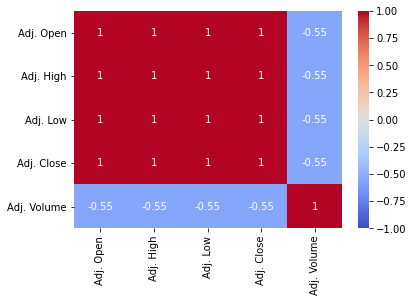

In [ ]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


In [ ]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100

In [ ]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
0,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956,0.324968
1,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706,7.227007
2,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360,-1.227880
3,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099,-5.726357
4,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792,1.183658


In [ ]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume',]]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0
2004-08-20,54.322689,7.921706,7.227007,22834300.0
2004-08-23,54.869377,4.049360,-1.227880,18256100.0
2004-08-24,52.597363,7.657099,-5.726357,15247300.0
2004-08-25,53.164113,3.886792,1.183658,9188600.0


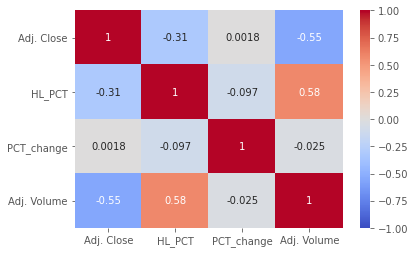

In [ ]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
forecast_col = 'Adj. Close'


In [ ]:
df.fillna(-999999, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adj. Close   3424 non-null   float64
 1   HL_PCT       3424 non-null   float64
 2   PCT_change   3424 non-null   float64
 3   Adj. Volume  3424 non-null   float64
dtypes: float64(4)
memory usage: 107.1 KB


In [ ]:
forecast_out = int(math.ceil(0.01 * len(df)))  #we want to predict 1% of the entire data set

In [ ]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [ ]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.886792,1.183658,9188600.0,71.219849


In [ ]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
3419,1094.00,1.964351,0.130884,1990515.0,NaN
3420,1053.15,3.254997,-2.487014,3418154.0,NaN
3421,1026.55,4.082607,-2.360729,2413517.0,NaN
3422,1054.09,4.619150,0.332191,3272409.0,NaN
3423,1006.94,6.645878,-5.353887,2940957.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adj. Close   3424 non-null   float64
 1   HL_PCT       3424 non-null   float64
 2   PCT_change   3424 non-null   float64
 3   Adj. Volume  3424 non-null   float64
 4   label        3389 non-null   float64
dtypes: float64(5)
memory usage: 133.9 KB


In [ ]:
#df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3388
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Adj. Close   3389 non-null   float64
 1   HL_PCT       3389 non-null   float64
 2   PCT_change   3389 non-null   float64
 3   Adj. Volume  3389 non-null   float64
 4   label        3389 non-null   float64
dtypes: float64(5)
memory usage: 158.9 KB


In [ ]:
df.isnull().sum()

Adj. Close     0
HL_PCT         0
PCT_change     0
Adj. Volume    0
label          0
dtype: int64

In [ ]:
#X = np.array(df.drop(['label'], axis=1))
#y = np.array(df['label'])

array([[ 5.03228418e+01,  8.07295560e+00,  3.24967503e-01,
         4.46590000e+07],
       [ 5.43226889e+01,  7.92170621e+00,  7.22700723e+00,
         2.28343000e+07],
       [ 5.48693765e+01,  4.04936015e+00, -1.22788010e+00,
         1.82561000e+07],
       ...,
       [ 1.18159000e+03,  1.53098791e+00,  4.76194525e-01,
         2.77496700e+06],
       [ 1.11920000e+03,  1.79860615e+00, -7.29098295e-01,
         5.79888000e+06],
       [ 1.06876000e+03,  5.45024140e+00, -2.89384977e+00,
         3.74246900e+06]])

In [ ]:
#X = preprocessing.scale(X)
#y = np.array(df['label'])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Classifier 

In [ ]:
print(forecast_out)

35


In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9770522700575782


In [ ]:
clf2 = svm.SVR()
clf2.fit(X_train, y_train)
accuracy = clf2.score(X_test, y_test)
print(accuracy)

0.7843198964907309


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
reg = Ridge(alpha=0.5)
reg.fit(X_train, y_train)
accuracy = reg.score(X_test, y_test)
print(accuracy)

0.9770520120512379


forecasting properly the prices for the last 1% days for which we have NaN values in the label

In [ ]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
test = np.random.randint(low=0, high=1001, size=(20))
test

array([121, 438, 867, 453,  84, 717, 300, 922, 778, 130, 794, 305,  99,
       793, 121, 884, 297, 281, 912,   2])

In [ ]:
test[-10:]

array([794, 305,  99, 793, 121, 884, 297, 281, 912,   2])

In [ ]:
test[:-10]

array([121, 438, 867, 453,  84, 717, 300, 922, 778, 130])

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1041.2689824  1042.64869768 1051.60512267 1042.08370058 1044.04936574
 1048.12373189 1052.97564799 1040.73970868 1035.03580417 1028.84181324
 1037.18436136 1048.89788424 1048.64804196 1044.64570379 1033.15931162
 1037.96784557 1061.08000595 1068.67191825 1078.54047767 1070.28751554
 1076.91481182 1070.9103612  1090.6245492  1100.2434342  1099.42120296
 1093.09771603 1113.09945068 1114.12005799 1117.00145948 1118.3543488
 1120.63436539 1122.05529429 1109.72690496 1113.95443981 1089.0752862 ] 0.9802402948610965 35


In [ ]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [ ]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

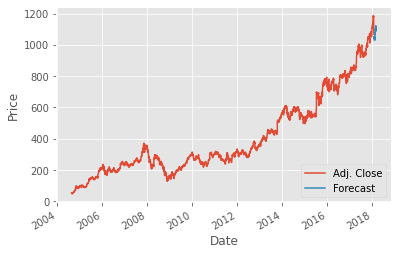

In [ ]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [142]:
import pickle

In [143]:
clf = LinearRegression()
clf.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
with open('/content/drive/My Drive/python data/pickle_classifiers/linearregression.pickle','wb') as f:
  pickle.dump(clf, f)

In [146]:
pickle_in = open('/content/drive/My Drive/python data/pickle_classifiers/linearregression.pickle','rb')
clf = pickle.load(pickle_in)

0.9802402948610965


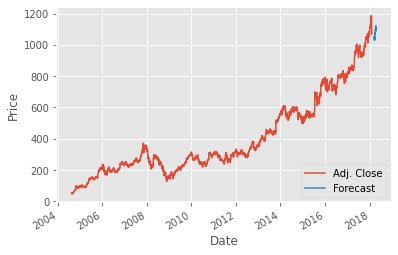

In [147]:
confidence = clf.score(X_test, y_test)
print(confidence)
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()